## Plots Figure 9

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
plt.rcParams['text.usetex'] = True
from plots_functions import *

In [8]:
# γ = .70
γ = .60
v0 = 2.0
# α = 1.8
α = 1.7
ω = .25
ε = np.finfo(float).eps
v = np.vectorize(lambda k: np.maximum(v0 - γ*k,ε))
μ = lambda k: 1./v(k)
D = lambda u: α - ω*u
d = lambda A: (α-A)/ω
Z = lambda k: D(μ(k))
f = lambda k: k*v(k)

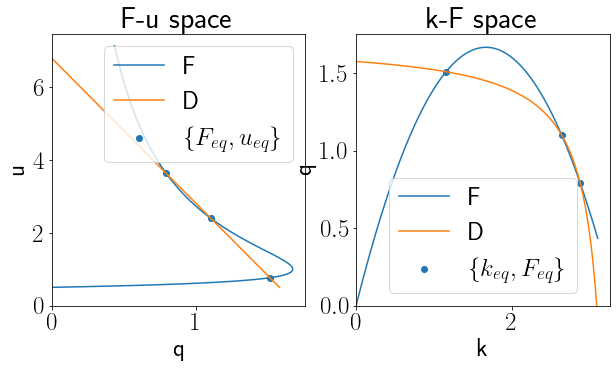

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
karr = np.linspace(0.0,3.1,100)
uarr = μ(karr)
ax[0].plot(f(karr),uarr, label = r'F')
ax[0].plot(D(uarr),uarr, label = r'D')
ax[0].set(title = 'F-u space', xlabel = 'q', ylabel = 'u')

ax[1].plot(karr,f(karr), label = r'F')
ax[1].plot(karr,D(μ(karr)), label = r'D')
ax[1].set(title = 'k-F space', xlabel = 'k', ylabel = 'q')

keq = fsolve(lambda k: f(k) - D(μ(k)), [1., 2.5, 3.])
ax[0].scatter(f(keq),μ(keq), label = r'$\{F_{eq}, u_{eq}\}$')
ax[1].scatter(keq,f(keq), label = r'$\{k_{eq}, F_{eq}\}$')
ax[0].set(xlim = [0,None], ylim = [0,None])
ax[1].set(xlim = [0,None], ylim = [0,None])
ax[0].legend()
ax[1].legend()
fig.show()

In [10]:
fp = lambda k: v(k) - γ*k
Dp = -ω
β = 3.
θ = β*fp(keq[2])*Dp/(β + 1/μ(keq[2])) + 2.
def dx_dt(x,t,θ,β):
    k,A,u = x
    dk = A - f(k)
    dA = θ*(d(A) - u)
    du = β*(μ(k) - u)
    if dk < 0 and k < 0.01:
        dk = 0.0
    if dA < 0 and A < 0.01:
        dA = 0.0
    if du < 0 and u < 0.01:
        du = 0.0
    return [dk, dA, du]

[Text(0.5, 0.92, 'k-A-u space'),
 Text(0.5, 0, 'k'),
 Text(0.5, 0.5, 'A'),
 Text(0.5, 0, 'u')]

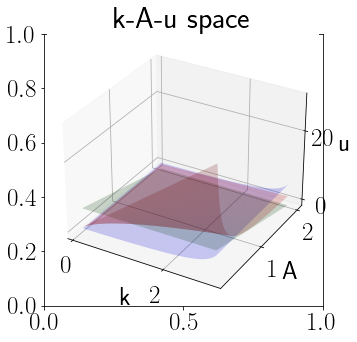

In [11]:
karr = np.linspace(0.1,3,100)
Aarr = np.linspace(0.1,2,100)
X, Y = np.meshgrid(karr,Aarr)
U_kdot = np.vectorize(lambda k,A: k/A)(X,Y)
U_Adot = np.vectorize(lambda k,A: d(A))(X,Y)
U_udot = np.vectorize(lambda k,A: μ(k))(X,Y)
fig = plt.subplots(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,U_udot,color='blue',edgecolor='none', alpha = 0.2)
ax.plot_surface(X,Y,U_kdot,color='red',edgecolor='none', alpha = 0.2)
ax.plot_surface(X,Y,U_Adot,color='green',edgecolor='none', alpha = 0.2)
ax.set(title = 'k-A-u space', xlabel = 'k', ylabel = 'A', zlabel = 'u')

### Figure 9

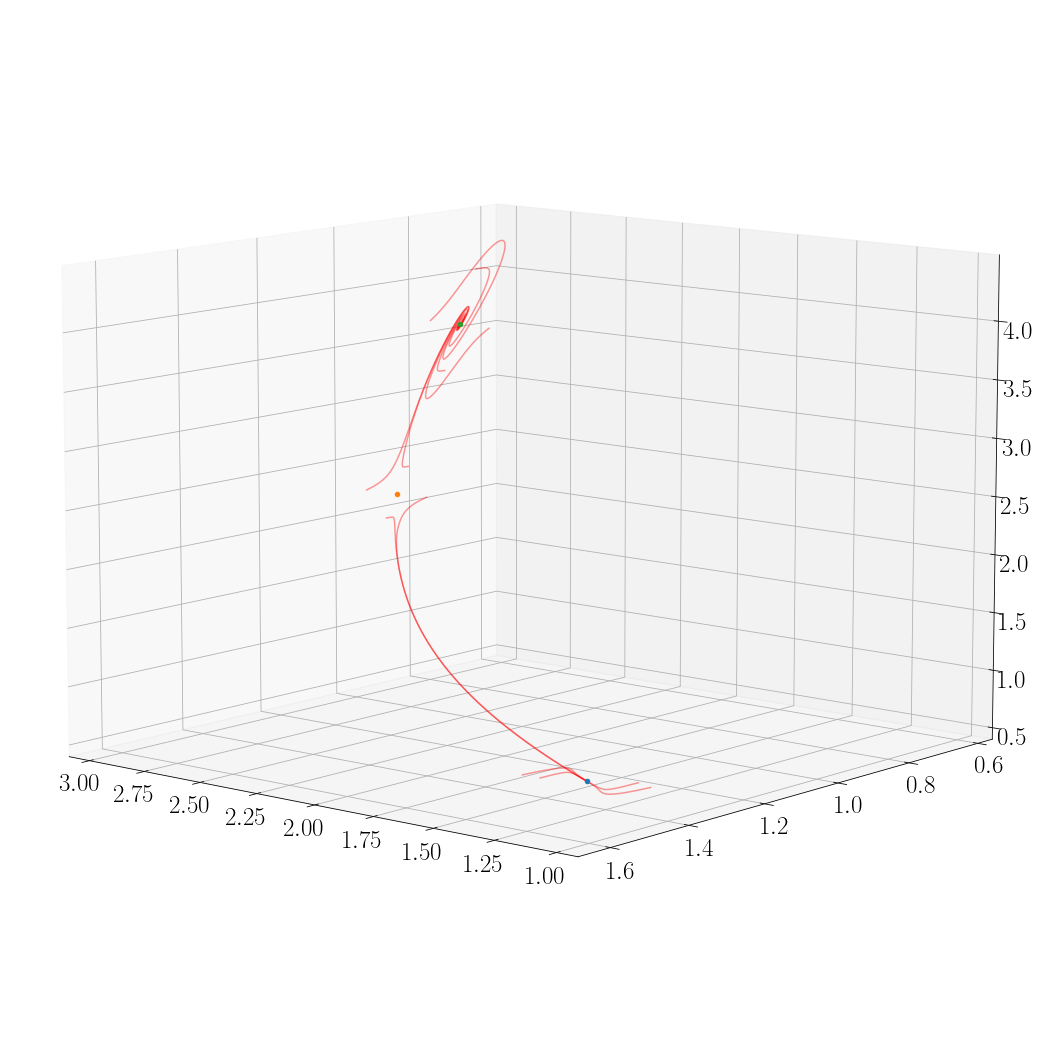

In [15]:
kreq1 = [keq[0]+0.1, keq[0]-0.1, keq[0]+0.1, keq[0]-0.1]
Areq1 = [f(keq[0])+0.1, f(keq[0])-0.1, f(keq[0] + 0.1), f(keq[0] - 0.1)]
ureq1 = [μ(keq[0])+0.1, μ(keq[0])-0.1, μ(keq[0] + 0.1), μ(keq[0] - 0.1)]

kreq2 = [keq[1]+0.05, keq[1]-0.05, keq[1]+0.05, keq[1]-0.05]
Areq2 = [f(keq[1])+0.05, f(keq[1])-0.05, f(keq[1] + 0.05), f(keq[1] - 0.05)]
ureq2 = [μ(keq[1])+0.05, μ(keq[1])-0.05, μ(keq[1] + 0.05), μ(keq[1] - 0.05)]

kreq3 = [keq[2]+0.05, keq[2]-0.05, keq[2]+0.05, keq[2]-0.05]
Areq3 = [f(keq[2])+0.05, f(keq[2])-0.05, f(keq[2] + 0.05), f(keq[2] - 0.05)]
ureq3 = [μ(keq[2])+0.05, μ(keq[2])-0.05, μ(keq[2] + 0.05), μ(keq[2] - 0.05)]

kreq = kreq1 + kreq2 + kreq3
Areq = Areq1 + Areq2 + Areq3
ureq = ureq1 + ureq2 + ureq3

kmax, kmin = 3., 0.1
Amax, Amin = 2., 0.1
umax, umin = 5., 0.1
karr = np.linspace(kmin,kmax,5)
Aarr = np.linspace(Amin,Amax,5)
uarr = np.linspace(umin,umax,5)
ts = np.linspace(0,20,500)

fig = plt.figure(figsize=(15,15))
plt.rcParams['font.size'] = '25'
ax = plt.axes(projection='3d')

for i, k in enumerate(kreq):
    x0 = [k,Areq[i],ureq[i]]
    x = odeint(dx_dt,x0,ts,args=(θ,β))
    ax.plot3D(x[:,0],x[:,1], x[:,2],alpha = 0.4, color = 'red', ls = '-')
# ax.set(title = 'k-A-u space', xlabel = 'k', ylabel = 'A', zlabel = 'u')
karr = np.linspace(0.1,3,100)
Aarr = np.linspace(0.1,2,100)
X, Y = np.meshgrid(karr,Aarr)
U_kdot = np.vectorize(lambda k,A: k/A)(X,Y)
U_Adot = np.vectorize(lambda k,A: d(A))(X,Y)
U_udot = np.vectorize(lambda k,A: μ(k))(X,Y)
ax.scatter3D(keq[0], f(keq[0]), μ(keq[0]), label = r'$\{k_{eq}, A_{eq}, u_{eq}\}$: $z$')
ax.scatter3D(keq[1], f(keq[1]), μ(keq[1]), label = r'$\{k_{eq}, A_{eq}, u_{eq}\}$: $y$')
ax.scatter3D(keq[2], f(keq[2]), μ(keq[2]), label = r'$\{k_{eq}, A_{eq}, u_{eq}\}$: $x$')
# ax.set(title = 'k-A-u space', xlabel = 'k', ylabel = 'A', zlabel = 'u')
# ax.legend()
ax.view_init(elev=10, azim=130)
fig.tight_layout()
fig.savefig("../../fig/kAu_model/kAu.pdf")